In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

### Import stock data of TATA Motors

In [2]:
symbol = 'TATAMOTORS.NS'
start = '2020-01-01'
end = '2021-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.149994,186.699997,183.600006,184.449997,184.449997,25968357
2020-01-02,185.000000,194.699997,184.600006,193.750000,193.750000,57289863
2020-01-03,192.899994,195.649994,189.250000,191.100006,191.100006,47572728
2020-01-06,191.000000,191.000000,185.050003,185.649994,185.649994,28621212
2020-01-07,187.000000,189.399994,182.300003,184.699997,184.699997,34995035


In [3]:
#macd is the macd line i.e 12EMA- 26EMA
df['macd']=ta.EMA(df['Adj Close'], timeperiod = 12) - ta.EMA(df['Adj Close'], timeperiod = 26)

In [4]:
#macdsignal is the signal line 9EMA of macd line
df['macdsignal']=ta.EMA(df['macd'], timeperiod = 9)

In [5]:
#macdhist is the diff between macd and macdsignal
df['macdhist']=df['macd'] - df['macdsignal']

In [6]:
df.dropna(inplace=True)

In [7]:
#direct using lib function
#df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

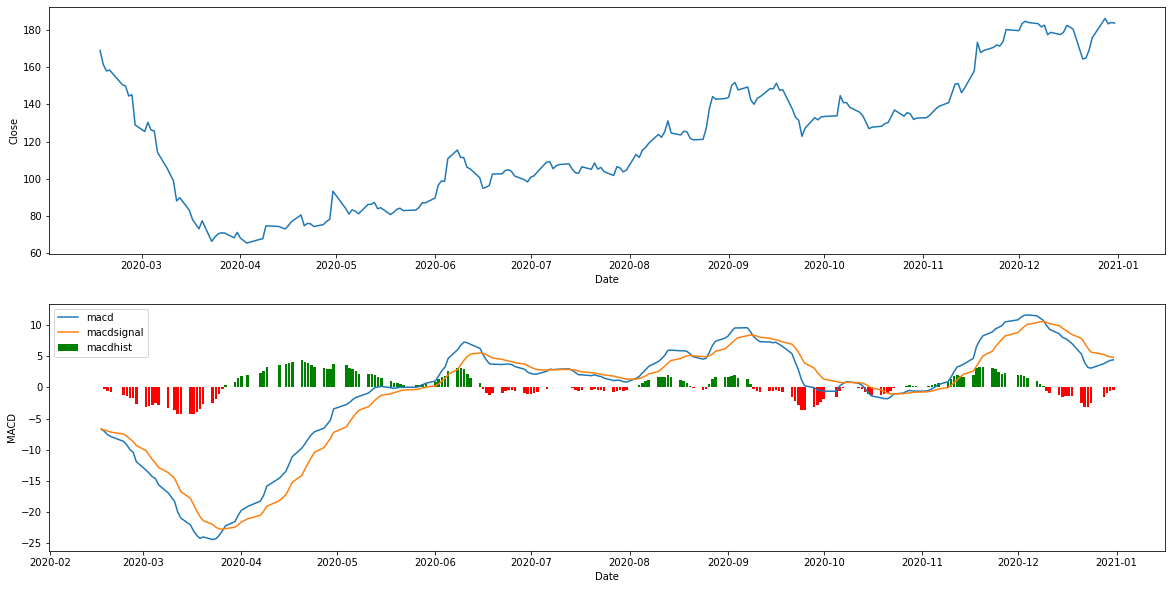

In [8]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Close'])
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend()

fig.show()